## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=94)

# Use "hist" for constructing the trees, with early stopping enabled.
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])
# Save model into JSON format.
clf.save_model("clf.json")

[0]	validation_0-logloss:0.45997
[1]	validation_0-logloss:0.34184
[2]	validation_0-logloss:0.27076
[3]	validation_0-logloss:0.22399
[4]	validation_0-logloss:0.19346
[5]	validation_0-logloss:0.16814
[6]	validation_0-logloss:0.15393
[7]	validation_0-logloss:0.14081
[8]	validation_0-logloss:0.13269
[9]	validation_0-logloss:0.12515
[10]	validation_0-logloss:0.11551
[11]	validation_0-logloss:0.11184
[12]	validation_0-logloss:0.10799
[13]	validation_0-logloss:0.10541
[14]	validation_0-logloss:0.10493
[15]	validation_0-logloss:0.10326
[16]	validation_0-logloss:0.10300
[17]	validation_0-logloss:0.10339
[18]	validation_0-logloss:0.10160
[19]	validation_0-logloss:0.09892
[20]	validation_0-logloss:0.09478
[21]	validation_0-logloss:0.09359
[22]	validation_0-logloss:0.09247
[23]	validation_0-logloss:0.09284
[24]	validation_0-logloss:0.09266


In [3]:
early_stop = xgb.callback.EarlyStopping(
    rounds=2, metric_name='logloss', data_name='validation_0', save_best=True
)
clf = xgb.XGBClassifier(tree_method="hist", callbacks=[early_stop])
clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.45997
[1]	validation_0-logloss:0.34184
[2]	validation_0-logloss:0.27076
[3]	validation_0-logloss:0.22399
[4]	validation_0-logloss:0.19346
[5]	validation_0-logloss:0.16814
[6]	validation_0-logloss:0.15393
[7]	validation_0-logloss:0.14081
[8]	validation_0-logloss:0.13269
[9]	validation_0-logloss:0.12515
[10]	validation_0-logloss:0.11551
[11]	validation_0-logloss:0.11184
[12]	validation_0-logloss:0.10799
[13]	validation_0-logloss:0.10541
[14]	validation_0-logloss:0.10493
[15]	validation_0-logloss:0.10326
[16]	validation_0-logloss:0.10300
[17]	validation_0-logloss:0.10339
[18]	validation_0-logloss:0.10160
[19]	validation_0-logloss:0.09892
[20]	validation_0-logloss:0.09478
[21]	validation_0-logloss:0.09359
[22]	validation_0-logloss:0.09247
[23]	validation_0-logloss:0.09284


XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EarlyStopping object at 0x00000234B1D74490>],
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [4]:
y_pred=clf.predict(X_test)

In [5]:
accuracy_score(y_pred,y_test)

0.965034965034965

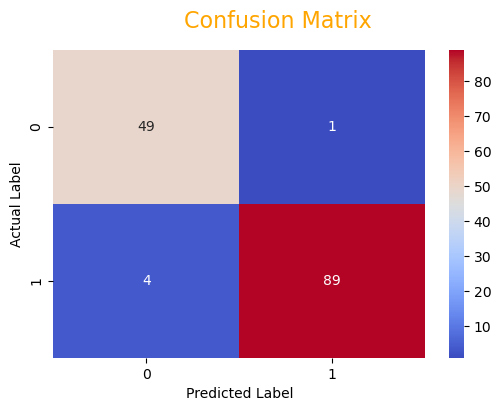

In [6]:
cf_matrix=confusion_matrix(y_pred,y_test)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",
                 color="orange",
                 fontsize=16);
ax.set(xlabel="Predicted Label",
           ylabel="Actual Label");